In [1]:
import warnings
warnings.simplefilter('ignore') #ignores simple warning

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob as glob
import matplotlib.ticker as tk
import matplotlib.patches as mpatches

In [3]:
vortdata=pd.read_csv("C:/Users/nariz/Script Phyton/Bismillah Disertasi/Borneo Vortex/so3cens/V/198112/V-L-198112190000-0925.csv")

In [4]:
vortdata

,time,ty,lev,lat,lon,valV,So,ro,Do,SBG,SBGang,m,n,SR,EE,XX,ex,valX,lonX,latX
0,1981-12-19,0,925,1.0,111.5,-32.218806,3.7502,1100.0,41.252201,1.561365,2.440471,-1.193069,1.007197,0.416342,0.99232,0.554035,1,-32,112.0,0.75


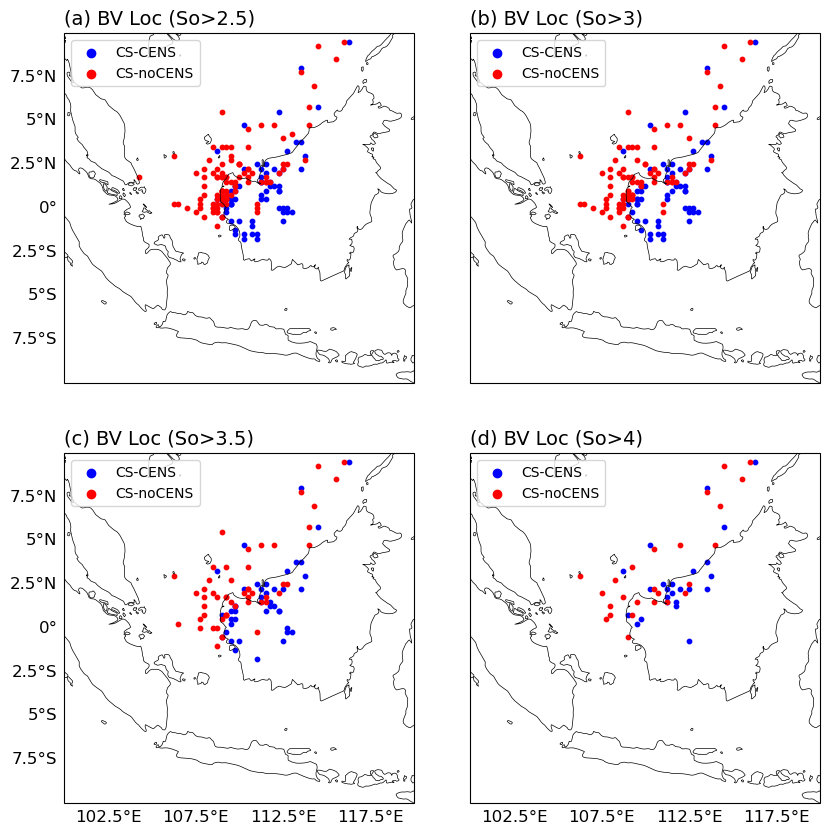

In [4]:
#Pengaturan besar gambar
fig=plt.figure(figsize=(10,10))
for sbp, so, alp, son in zip([221,222,223,224],['25','3','35','4'],['(a)','(b)','(c)','(d)'],['2.5','3','3.5','4']):
    ax=plt.subplot(sbp, projection=ccrs.PlateCarree())
    
    #Pengaturan garis pantai
    ax.coastlines(color='black', linewidth=0.5)
    
    #Mengatur batas lon lat yang ingin ditampilkan
    ax.set_extent([100, 120, -10, 10])
    
    #Mengatur tampilan lat lon
    gl=ax.gridlines(draw_labels=True, linewidth=0) 
    gl.top_labels = False
    gl.right_labels = False 
    if sbp== 222 or sbp==224:
        gl.left_labels=False
    if sbp== 221 or sbp==222:
        gl.bottom_labels=False
    #gl.xlocator = tk.FixedLocator([100, 110, 120]) 
    #gl.ylocator = tk.FixedLocator(np.arange(-10,11,5)) 
    gl.xlabel_style = {'size': 12} #Mengatur besar font pada lon
    gl.ylabel_style = {'size': 12} #Mengatur besar font pada lat
    
    for folder in glob.glob("C:/Users/nariz/Script Phyton/Bismillah Disertasi/Borneo Vortex/so"+so+"cens/V/*"):
        file=glob.glob(folder+"/V-L*")
        for name in file:
            vortdata=pd.read_csv(name)
            logic1=vortdata['lat']>-2.5
            logic2=vortdata['lon']<120
            logic=np.logical_and(logic1, logic2)
            vortplot=vortdata[logic][vortdata[logic]['So']==vortdata[logic]['So'].max()]
            #print(len(vortplot))
            ax.scatter(vortplot['lon'], vortplot['lat'], c='b', s=10)
    
    for folder in glob.glob("C:/Users/nariz/Script Phyton/Bismillah Disertasi/Borneo Vortex/so"+so+"nocens/V/*"):
        file=glob.glob(folder+"/V-L*")
        for name in file:
            vortdata=pd.read_csv(name)
            logic1=vortdata['lat']>-2.5
            logic2=vortdata['lon']<118
            logic=np.logical_and(logic1, logic2)
            vortplot=vortdata[logic][vortdata[logic]['So']==vortdata[logic]['So'].max()]
            #print(len(vortplot))
            ax.scatter(vortplot['lon'], vortplot['lat'], c='r', s=10)
        
    ax.set_title(alp+' BV Loc '+'(So>'+son+')', fontsize=14, loc='left')
    ax.scatter([],[], c='b', label='CS-CENS')
    ax.scatter([],[], c='r', label='CS-noCENS')
    plt.legend()

#Jika ingin menyimpan file
#plt.savefig('folder/namafile.jpg', dpi=200)
plt.subplots_adjust(wspace=0.1)
plt.show()